In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import exposure
from skimage.exposure import cumulative_distribution

In [21]:
img = cv2.imread('image.jpg')

print(img.shape)
# (300, 264, 3) => H, W, C

# im_gamma = (a(img/255)^gamma+b) * 255
# a = 1, b = 0
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('w4_1.mp4', fourcc, 15, (img.shape[1], img.shape[0]))

rows = 2
num = 0
# G -> Gamma

for G in np.arange(0.1, 3, 0.1):
  n_img = ((1.0*((img / 255) ** G) + 0) * 255).astype(np.uint8)
  out.write(n_img)
for G in np.arange(3, 0.1, -0.1):
  n_img = ((1.0*((img / 255) ** G) + 0) * 255).astype(np.uint8)
  out.write(n_img)

out.release()


(300, 264, 3)


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


(0.0, 256.0)

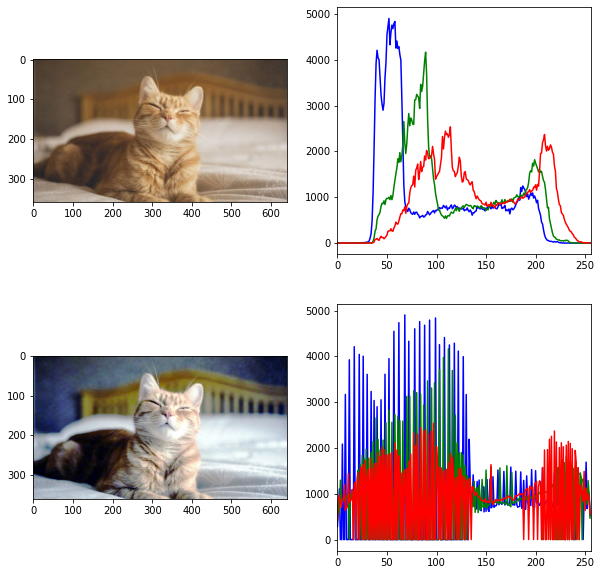

In [42]:
img_2 = cv2.imread('cat2.jpg')

fig = plt.figure(figsize=(10, 10))

b,g,r = cv2.split(img_2)

# hist = cv2.calcHist([img],[0],None,[256],[0,256])
    
fig.add_subplot(2, 2, 1)
img_t = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_t)

histr = cv2.calcHist([img_2],[0],None,[256],[0,256])
fig.add_subplot(2, 2, 2)
plt.plot(histr,color = 'b')
plt.xlim([0,256])
histr = cv2.calcHist([img_2],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
histr = cv2.calcHist([img_2],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])

b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)
new_img = cv2.merge([r,g,b])
fig.add_subplot(2, 2, 3)
plt.imshow(new_img)

histr = cv2.calcHist([new_img],[2],None,[256],[0,256])
fig.add_subplot(2, 2, 4)
plt.plot(histr,color = 'b')
plt.xlim([0,256])
histr = cv2.calcHist([new_img],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
histr = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])


(0.0, 256.0)

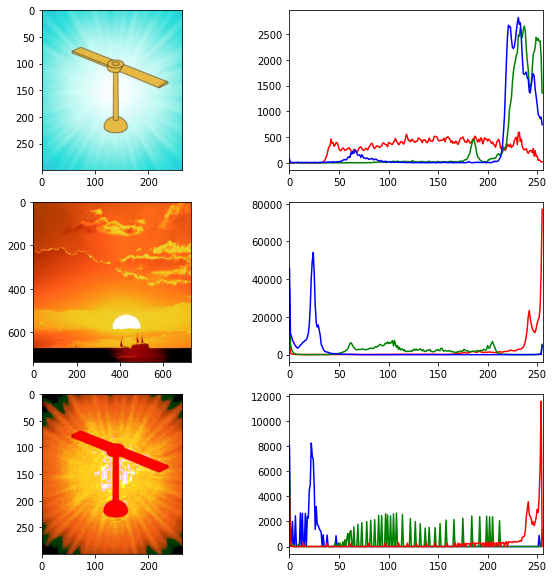

In [84]:
def cdf(im):
    c, b = cumulative_distribution(im)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1] + 1, 256):
        c = np.append(c, 1)
    return c

def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))
    pix_repl =  {i: b[i] for i in range(256)}
    mp = np.arange(0, 256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

img_4 = cv2.imread('image.jpg')
img_sun = cv2.imread('sun.jpeg')

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(3, 2, 1)
img_4 = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)
plt.imshow(img_4)

histr = cv2.calcHist([img_4],[0],None,[256],[0,256])
fig.add_subplot(3, 2, 2)
plt.plot(histr,color = 'r')
plt.xlim([0,256])
histr = cv2.calcHist([img_4],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
histr = cv2.calcHist([img_4],[2],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256])

fig.add_subplot(3, 2, 3)
img_sun = cv2.cvtColor(img_sun, cv2.COLOR_BGR2RGB)
plt.imshow(img_sun)

histr = cv2.calcHist([img_sun],[0],None,[256],[0,256])
fig.add_subplot(3, 2, 4)
plt.plot(histr,color = 'r')
plt.xlim([0,256])
histr = cv2.calcHist([img_sun],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
histr = cv2.calcHist([img_sun],[2],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256])

r,g,b = cv2.split(img_4)
t_r,t_g,t_b = cv2.split(img_sun)

cdf_b = cdf(b)
cdf_g = cdf(g)
cdf_r = cdf(r)

cdf_t_b = cdf(t_b)
cdf_t_g = cdf(t_g)
cdf_t_r = cdf(t_r)

img_4[:,:,0] = hist_matching(cdf_r, cdf_t_r, img_4[:,:,0])
img_4[:,:,1] = hist_matching(cdf_g, cdf_t_g, img_4[:,:,1])
img_4[:,:,2] = hist_matching(cdf_b, cdf_t_b, img_4[:,:,2])
fig.add_subplot(3, 2, 5)
plt.imshow(img_4)


histr_r = cv2.calcHist([img_4],[2],None,[256],[0,256])
fig.add_subplot(3, 2, 6)
plt.plot(histr_r,color = 'b')
plt.xlim([0,256])
histr_r = cv2.calcHist([img_4],[1],None,[256],[0,256])
plt.plot(histr_r,color = 'g')
plt.xlim([0,256])
histr_r = cv2.calcHist([img_4],[0],None,[256],[0,256])
plt.plot(histr_r,color = 'r')
plt.xlim([0,256])